In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = "yelp_academic_dataset_business" + ".csv"
path = "C:/Users/tokud/OneDrive/Documents/Machine Learning - UCSD Extension Springboard Course/Capstone/Datasets/" + filename

chunk_iterator = pd.read_csv(path, chunksize=10000)

chunks = []

for chunk in chunk_iterator:
  chunks.append(chunk)

business_df = pd.concat(chunks, ignore_index=True)
business_df.shape

(150346, 14)

In [4]:
df_florida = business_df[business_df['state'] == 'FL']
df_florida.shape

(26330, 14)

In [7]:
fl_restaurants = df_florida[df_florida['categories'].str.contains('restaurants', case=False, na=False)]
fl_restaurants.shape

(8731, 14)

In [8]:
fl_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8731 entries, 11 to 150292
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   8731 non-null   object 
 1   name          8731 non-null   object 
 2   address       8635 non-null   object 
 3   city          8731 non-null   object 
 4   state         8731 non-null   object 
 5   postal_code   8727 non-null   object 
 6   latitude      8731 non-null   float64
 7   longitude     8731 non-null   float64
 8   stars         8731 non-null   float64
 9   review_count  8731 non-null   int64  
 10  is_open       8731 non-null   int64  
 11  attributes    8631 non-null   object 
 12  categories    8731 non-null   object 
 13  hours         7748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1023.2+ KB


In [18]:
fl_restaurants.describe()

,latitude,longitude,stars,review_count,is_open
count,8731.000000,8731.000000,8731.000000,8731.000000,8731.000000
mean,27.980256,-82.569240,3.578342,87.485626,0.678044
std,0.154804,0.169213,0.828053,157.072413,0.467253
min,27.564457,-82.850318,1.000000,5.000000,0.000000
25%,27.885694,-82.726506,3.000000,15.000000,0.000000
50%,27.961624,-82.574565,3.500000,36.000000,1.000000
75%,28.055127,-82.450046,4.000000,95.000000,1.000000
max,28.498168,-82.103191,5.000000,3260.000000,1.000000


In [9]:
fl_restaurants.isnull().sum()

business_id       0
name              0
address          96
city              0
state             0
postal_code       4
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
attributes      100
categories        0
hours           983
dtype: int64

In [10]:
fl_restaurants.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

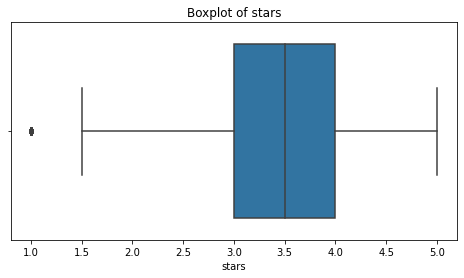

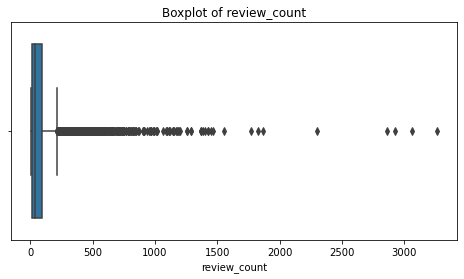

In [16]:
numeric_columns = fl_restaurants[['stars', 'review_count']]


for c in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=fl_restaurants[c])
    plt.title(f'Boxplot of {c}')
    plt.show()

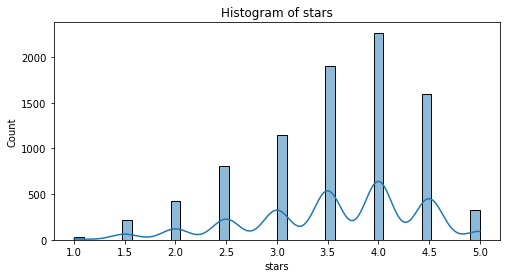

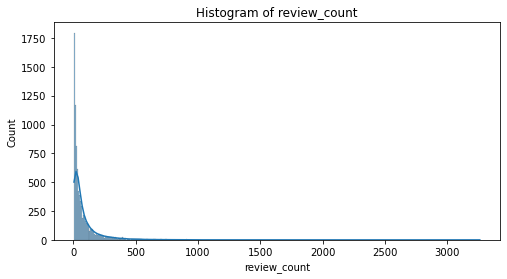

In [17]:
for c in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(fl_restaurants[c], kde=True)
    plt.title(f'Histogram of {c}')
    plt.show()

In [19]:
for col in fl_restaurants.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(fl_restaurants[col].nunique(), "unique values")
    print(fl_restaurants[col].value_counts().head(10))
    print("\n")

Column: business_id
8731 unique values
eEOYSgkmpB90uNA7lDOMRA    1
8DXIMrr2hJNUNnESAM4Fow    1
oES5_X2z1tDEzH20x_igtQ    1
h-0hwjiPSiWQD0UXgAy1_g    1
8m3-Xrqr2dkF-lLz5H1ZrA    1
V5Kaq2WsdsCKJ2JNoWgwxQ    1
Ck_VER3teqjj_8cuVkB1EA    1
Y1goKVvKvdU6af1zHeOtKw    1
h6us2dCkI0NeVZWbBDaqMw    1
Dzm1y59cLFt8OjTsZRUC6w    1
Name: business_id, dtype: int64


Column: name
6412 unique values
McDonald's                     123
Subway                          83
Burger King                     73
Taco Bell                       66
Wendy's                         64
Pizza Hut                       53
Hungry Howie's Pizza & Subs     43
Domino's Pizza                  42
Wawa                            42
Chick-fil-A                     37
Name: name, dtype: int64


Column: address
7071 unique values
4100 George J Bean Pkwy    21
615 Channelside Dr         19
1910 N Ola Ave             16
2223 N Westshore Blvd      11
5223 Orient Rd              9
25 Causeway Blvd            8
1113 Central Ave       

In [25]:
categories_subset = fl_restaurants[['categories']]

categories_subset
categories_subset['categories_list'] = categories_subset['categories'].str.split(', ')

from collections import Counter

categories_flat = categories_subset['categories_list'].explode()
categories_count = Counter(categories_flat)

C:\Users\tokud\AppData\Local\Temp/ipykernel_15592/954049995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories_subset['categories_list'] = categories_subset['categories'].str.split(', ')


In [28]:
categories_count

Counter({'Vietnamese': 112,
         'Food': 2656,
         'Restaurants': 8731,
         'Food Trucks': 276,
         'Delis': 368,
         'Italian': 746,
         'Bakeries': 288,
         'American (New)': 1011,
         'Pizza': 1071,
         'Burgers': 903,
         'Sports Bars': 398,
         'Bars': 1498,
         'Lounges': 108,
         'Salad': 567,
         'Wraps': 82,
         'Nightlife': 1546,
         'French': 45,
         'Moroccan': 6,
         'Seafood': 846,
         'Mediterranean': 223,
         'Mexican': 687,
         'Fast Food': 1081,
         'Barbeque': 329,
         'Japanese': 280,
         'Sushi Bars': 369,
         'Sandwiches': 1455,
         'Chicken Shop': 163,
         'Steakhouses': 286,
         'American (Traditional)': 1499,
         'Beer Bar': 127,
         'Hawaiian': 40,
         'Street Vendors': 48,
         'Pubs': 218,
         'Arts & Entertainment': 194,
         'Irish': 45,
         'Music Venues': 97,
         'Soul Food': 72,


In [29]:
print(categories_count.most_common(10))

[('Restaurants', 8731), ('Food', 2656), ('Nightlife', 1546), ('American (Traditional)', 1499), ('Bars', 1498), ('Sandwiches', 1455), ('Breakfast & Brunch', 1095), ('Fast Food', 1081), ('Pizza', 1071), ('American (New)', 1011)]


In [41]:
import ast

attributes_subset = fl_restaurants[['attributes']]
attributes_subset['attributes_dict'] = attributes_subset['attributes'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else {})

attributes_flat = pd.json_normalize(attributes_subset['attributes_dict'])

attributes_subset = pd.concat([attributes_subset, attributes_flat], axis=1)

attributes_subset.drop(columns=['attributes', 'attributes_dict'], inplace=True)

C:\Users\tokud\AppData\Local\Temp/ipykernel_15592/2566052449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes_subset['attributes_dict'] = attributes_subset['attributes'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else {})


In [44]:
attributes_subset.columns

Index(['Alcohol', 'OutdoorSeating', 'RestaurantsReservations', 'Ambience',
       'GoodForMeal', 'BusinessParking', 'RestaurantsGoodForGroups', 'WiFi',
       'RestaurantsPriceRange2', 'RestaurantsDelivery', 'RestaurantsAttire',
       'BusinessAcceptsCreditCards', 'RestaurantsTakeOut', 'Caters',
       'NoiseLevel', 'GoodForKids', 'BusinessAcceptsBitcoin', 'BikeParking',
       'RestaurantsTableService', 'HasTV', 'WheelchairAccessible',
       'BestNights', 'ByAppointmentOnly', 'GoodForDancing', 'HappyHour',
       'Smoking', 'CoatCheck', 'Music', 'BYOB', 'DogsAllowed', 'DriveThru',
       'Corkage', 'BYOBCorkage', 'AcceptsInsurance',
       'RestaurantsCounterService', 'AgesAllowed', 'Open24Hours',
       'HairSpecializesIn', 'DietaryRestrictions'],
      dtype='object')

In [51]:
column_list = attributes_subset.columns.tolist()

for i in column_list:
    print(attributes_subset[i].value_counts())

u'none'             1973
u'full_bar'         1673
u'beer_and_wine'    1422
'none'               799
'beer_and_wine'      365
'full_bar'           349
None                   3
Name: Alcohol, dtype: int64
True     3882
False    3080
None      341
Name: OutdoorSeating, dtype: int64
False    4767
True     2249
None       52
Name: RestaurantsReservations, dtype: int64
{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}         1188
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}          808
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}           693
{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'tr

In [53]:
fl_restaurants.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

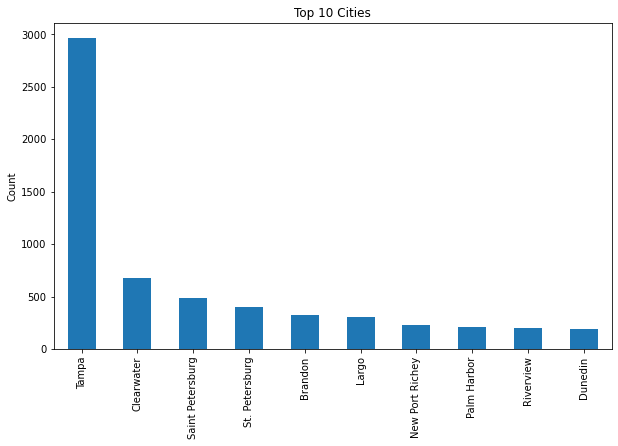

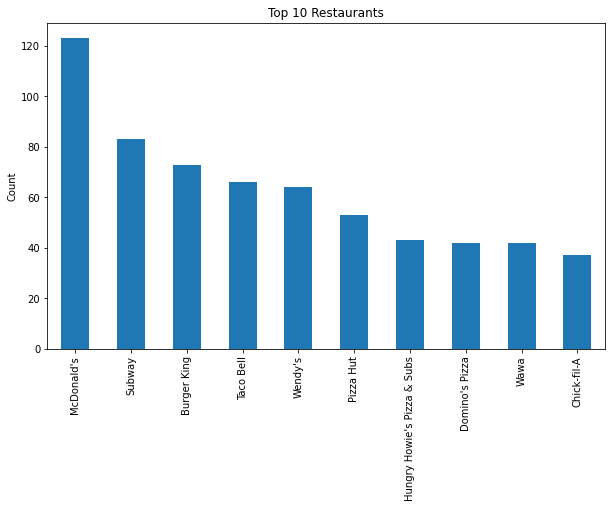

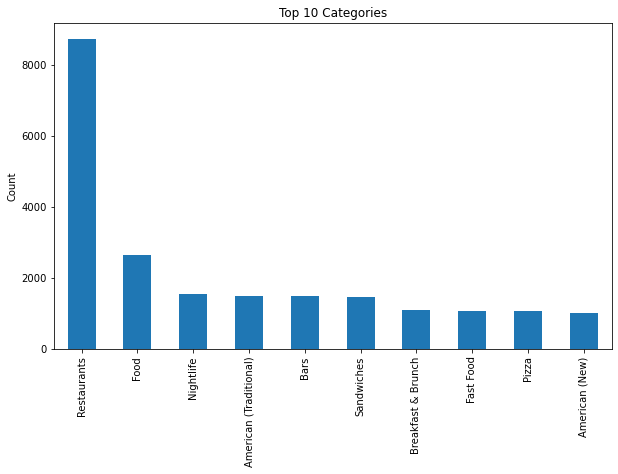

In [57]:
fl_restaurants['city'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Cities')
plt.ylabel('Count')
plt.show()

fl_restaurants['name'].value_counts().head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Restaurants')
plt.ylabel('Count')
plt.show()

pd.Series(dict(categories_count)).nlargest(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Categories')
plt.ylabel('Count')
plt.show()

                        stars  review_count
city                                       
Lutz fl              5.000000      8.000000
Town 'n' Country     4.666667     13.666667
wimauma              4.500000      8.000000
Tierre Verde         4.500000     42.000000
Palm harbor          4.500000    246.000000
Pass-a-Grille Beach  4.500000    152.000000
Greater Northdale    4.500000     26.000000
Pinecrest West Park  4.500000      9.000000
Twn N Cntry          4.500000     18.000000
TEMPLE TERR          4.500000     10.000000


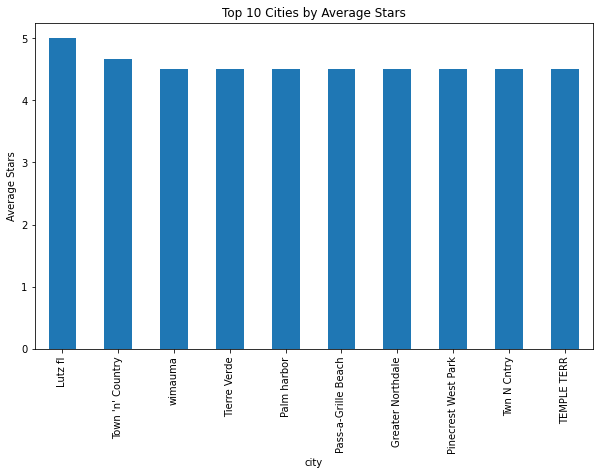

In [58]:
city_group = fl_restaurants.groupby('city')[['stars', 'review_count']].mean().sort_values(by='stars', ascending=False)
print(city_group.head(10))

city_group['stars'].head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Cities by Average Stars')
plt.ylabel('Average Stars')
plt.show()

In [59]:
fl_restaurants['address'].fillna('Unknown', inplace=True)
fl_restaurants['attributes'].fillna('N/A', inplace=True)
fl_restaurants['hours'].fillna('N/A', inplace=True)
fl_restaurants['postal_code'].fillna('Unknown', inplace=True)

c:\Users\tokud\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [60]:
fl_restaurants.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64